**Data Description**

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose(SOP) and (LOR)Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 ) outcome feature to predict



In [310]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [311]:
cd /content/drive/MyDrive/Colab Notebooks/deep learning/Graduate Admission Prediction Using DL/data

/content/drive/MyDrive/Colab Notebooks/deep learning/Graduate Admission Prediction Using DL/data


In [312]:
ls

Admission_Predict.csv  Admission_Predict_Ver1.1.csv


In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.drop(columns=['Serial No.'],axis=1,inplace=True)

In [315]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [316]:
columns=[]
for i in df.columns:
  columns.append(i.strip())
df.columns=columns
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

making a new selected column
* selected = 1 if chance of admit >=0.7
* selected = 0 if chance of admit <0.7

In [317]:
print(df.shape)
if 'Selected' in df.columns:
  df.drop(columns=['Selected'],axis=1,inplace=True)
df['Selected']=(df['Chance of Admit']>=0.7).astype(int)
df.head()

(500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Selected
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [318]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Selected             0
dtype: int64

**correlation**

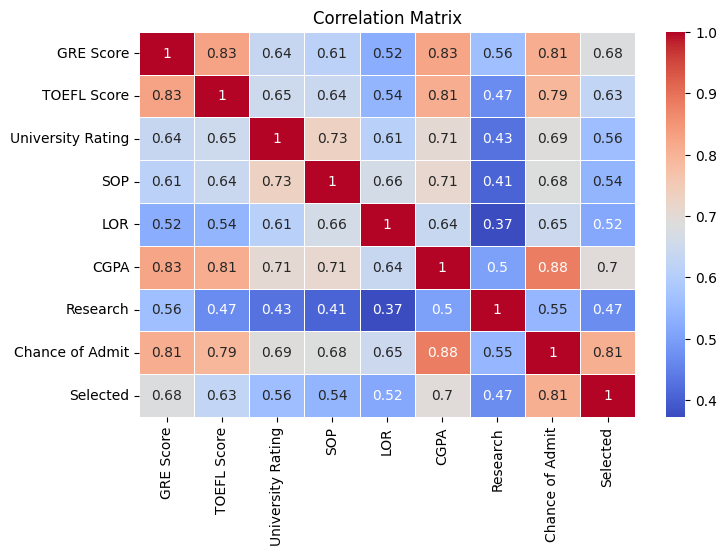

In [319]:
plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Analysis**

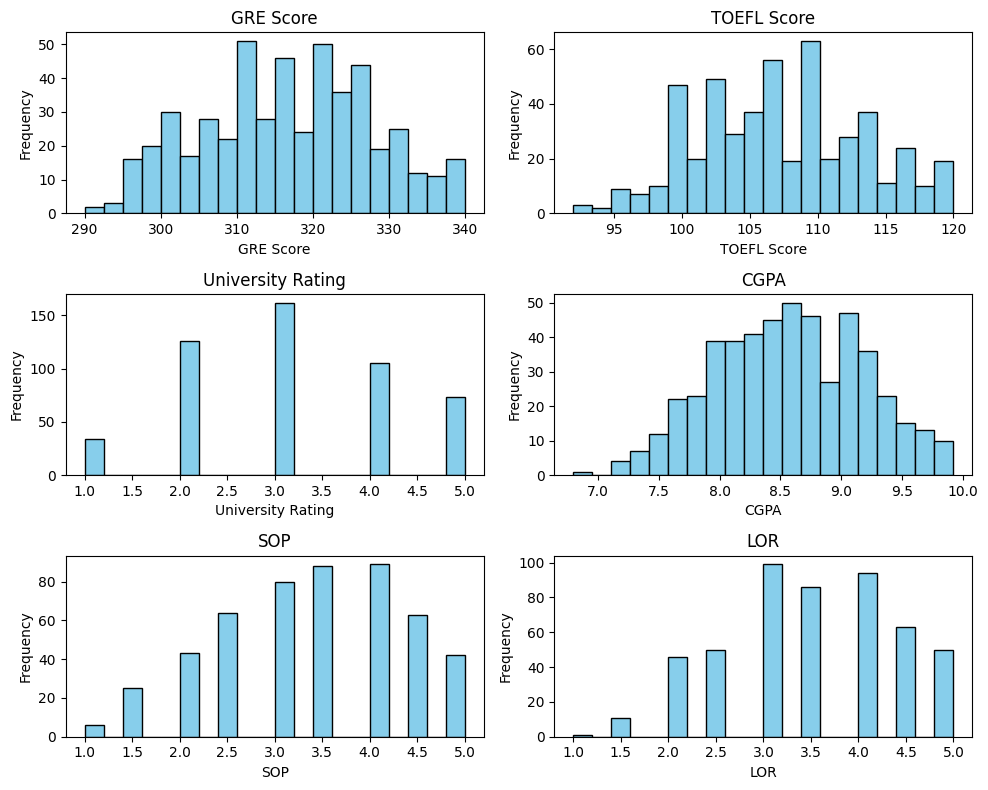

In [320]:
fig,axs= plt.subplots(3,2,figsize=(10,8))

axs[0,0].hist(df['GRE Score'],bins=20,color='skyblue', edgecolor='black')
axs[0,0].set_title('GRE Score')
axs[0,0].set_xlabel('GRE Score')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist(df['TOEFL Score'],bins=20,color='skyblue', edgecolor='black')
axs[0,1].set_title('TOEFL Score')
axs[0,1].set_xlabel('TOEFL Score')
axs[0,1].set_ylabel('Frequency')

axs[1,0].hist(df['University Rating'],bins=20,color='skyblue',edgecolor='black')
axs[1,0].set_title('University Rating')
axs[1,0].set_xlabel('University Rating')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist(df['CGPA'],bins=20,color='skyblue',edgecolor='black')
axs[1,1].set_title('CGPA')
axs[1,1].set_xlabel('CGPA')
axs[1,1].set_ylabel('Frequency')

axs[2,0].hist(df['SOP'],bins=20,color='skyblue',edgecolor='black')
axs[2,0].set_title('SOP')
axs[2,0].set_xlabel('SOP')
axs[2,0].set_ylabel('Frequency')

axs[2,1].hist(df['LOR'],bins=20,color='skyblue',edgecolor='black')
axs[2,1].set_title('LOR')
axs[2,1].set_xlabel('LOR')
axs[2,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

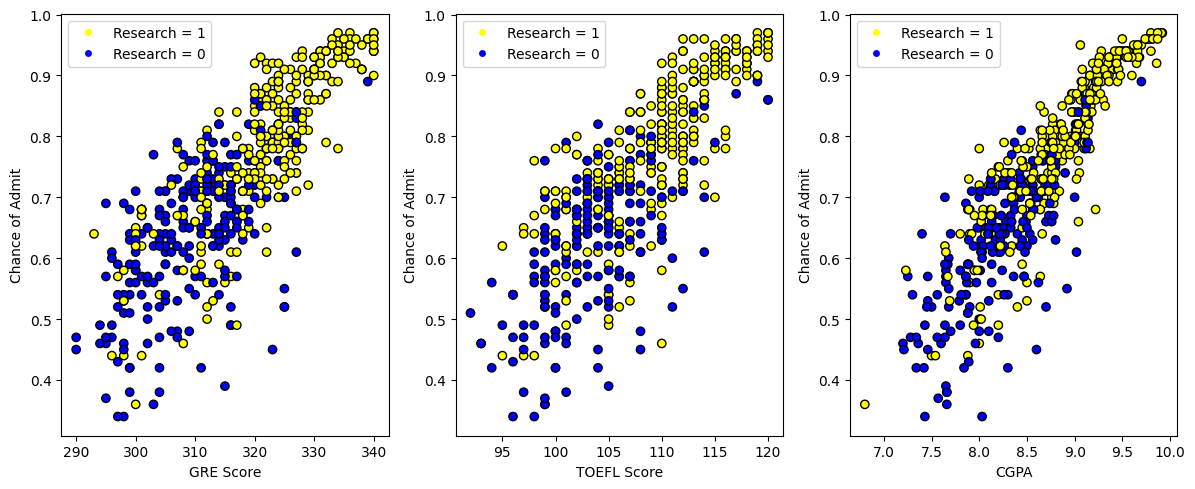

In [321]:
fig,axs=plt.subplots(1,3,figsize=(12,5))
colors = df['Research'].map({1: 'yellow', 0: 'blue'})

axs[0].scatter(x=df['GRE Score'],y=df['Chance of Admit'],c=colors,edgecolors='black')
axs[0].set_xlabel('GRE Score')
axs[0].set_ylabel('Chance of Admit')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Research = 1'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',  label='Research = 0')]

axs[0].legend(handles=handles)

axs[1].scatter(x=df['TOEFL Score'],y=df['Chance of Admit'],c=colors,edgecolors='black')
axs[1].set_xlabel('TOEFL Score')
axs[1].set_ylabel('Chance of Admit')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Research = 1'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',  label='Research = 0')]

axs[1].legend(handles=handles)

axs[2].scatter(x=df['CGPA'],y=df['Chance of Admit'],c=colors,edgecolors='black')
axs[2].set_xlabel('CGPA')
axs[2].set_ylabel('Chance of Admit')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', label='Research = 1'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',  label='Research = 0')]

axs[2].legend(handles=handles)

plt.tight_layout()


people with research experience have higher score in GRE,TOEFL and CGPA

**transformation**

In [322]:
X=df.iloc[:,:-2]
y=df.iloc[:,-2:-1]

In [323]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [324]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [325]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [326]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

**Regression**

In [327]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [328]:
import random
import os
seed = 7
random.seed(seed)
np.random.seed(seed)
tensorflow.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['PYTHONHASHSEED'] = str(seed)

session_conf = tensorflow.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tensorflow.compat.v1.Session(graph=tensorflow.compat.v1.get_default_graph(), config=session_conf)
tensorflow.compat.v1.keras.backend.set_session(sess)

In [329]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(8,activation='relu'))

model.add(Dense(4,activation='relu'))

# model.add(Dense(4,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam', loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=100,batch_size=10,validation_data=(X_test,y_test))

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.0541 - val_loss: 0.0430
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.0188
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0094
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0066
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 11/

In [330]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

4/4 [==============================] - 0s 4ms/step


0.8031778171377

In [331]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Root Mean Squared Error: 0.060577873381968045
Mean Absolute Error: 0.04693931540250777


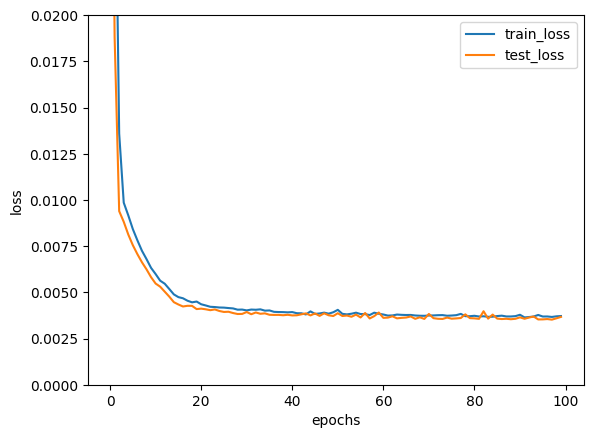

In [332]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')
plt.ylim(0, 0.02)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

**Classification**

here we are considering that the person is selected if its 'Chance of Admit' is above 0.7,
so with this assumption we can make this as a binary classification problem

In [333]:
y_class=df['Selected']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_class,test_size=0.2,random_state=7)

In [334]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [335]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(8,activation='relu'))

model.add(Dense(4,activation='relu'))

# model.add(Dense(4,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy')
history=model.fit(X_train,y_train,epochs=100,batch_size=1,validation_data=(X_test,y_test))

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 0.5785 - val_loss: 0.5497
Epoch 2/100
400/400 [==============================] - 1s 4ms/step - loss: 0.5217 - val_loss: 0.5117
Epoch 3/100
400/400 [==============================] - 2s 4ms/step - loss: 0.4882 - val_loss: 0.4683
Epoch 4/100
400/400 [==============================] - 1s 4ms/step - loss: 0.4477 - val_loss: 0.4254
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4129 - val_loss: 0.4023
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3926 - val_loss: 0.3848
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 0.3649
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3547 - val_loss: 0.3339
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3468 - val_loss: 0.3230
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3375 - val_lo

In [336]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred=model.predict(X_test)
y_pred=np.where(y_pred>0.5,1,0)

acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)

print('Accuracy:',acc*100)
print('Recall:',recall*100)
print('Confusion Matrix:\n',conf)

4/4 [==============================] - 0s 4ms/step
Accuracy: 88.0
Recall: 95.0
Confusion Matrix:
 [[31  9]
 [ 3 57]]


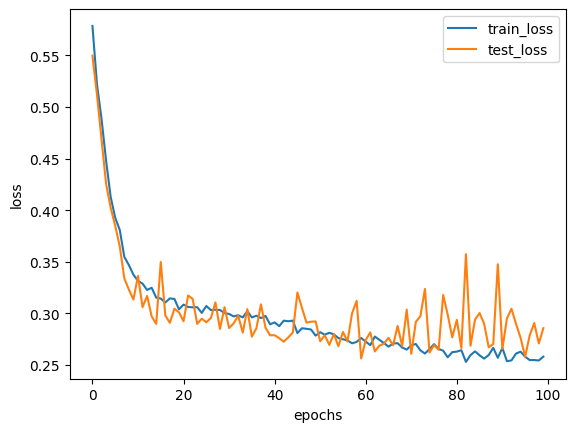

In [337]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='test_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()